In [52]:
import csv

import numpy as np
from matplotlib import pyplot as plt


def extract_x_y_axis(results: list) -> (list, dict):
    header = results[0]
    y_axis = {}
    for idx in range(1, len(header)):
        y_axis[results[0][idx]] = [int(row[idx]) for row in results[1:]]
    x_axis = [float(i) / 1024 for i in [row[0] for row in results][1:]]
    return x_axis, y_axis


def autolabel(plt, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


def plot_results(results: list, saved: bool, op: str):
    labels, y = extract_x_y_axis(results)
    x = np.arange(len(labels))

    plt.rcParams['figure.dpi'] = 50  # 分辨率
    plt.figure(figsize=(32, 16))
    width = 0.14  # the width of the bars

    num = len(y)
    widths = [(i - num // 2) * width for i in range(num)]
    idx = 0
    for y_key, y_val in y.items():
        rects = plt.bar(x + widths[idx], y_val, width, label=y_key)
        idx += 1
        autolabel(plt, rects)

    plt.title('cipher chain mode %s benchmark' % op)  # 折线图标题
    plt.xlabel('input length (KB)')  # x轴标题
    plt.ylabel('time cost (ns)')  # y轴标题
    plt.xticks(x, labels=labels)
    plt.legend()

    plt.tight_layout()
    if saved:
        plt.savefig("chainmodebench-%s.png" % op)
    else:
        plt.show()  # 显示折线图


In [53]:
!make test

make -C /lib/modules/5.17.5-1.el7.elrepo.x86_64/build M=/root/workspace/dm-security/benchmark modules
make[1]: Entering directory '/usr/src/kernels/5.17.5-1.el7.elrepo.x86_64'
  CC [M]  /root/workspace/dm-security/benchmark/chainmode.o
  MODPOST /root/workspace/dm-security/benchmark/Module.symvers
  CC [M]  /root/workspace/dm-security/benchmark/chainmode.mod.o
  LD [M]  /root/workspace/dm-security/benchmark/chainmode.ko
make[1]: Leaving directory '/usr/src/kernels/5.17.5-1.el7.elrepo.x86_64'


In [54]:
!dmesg | tail

[81714.412054] 2359296,1936,6767,2328
[81714.412057] 2621440,2103,7335,2588
[81714.412059] 2883584,2315,8169,2867
[81714.412061] 3145728,2555,8968,3158
[81714.412064] 3407872,2777,9800,3449
[81714.412066] 3670016,3005,10593,3747
[81714.412068] 3932160,3240,11411,4027
[81714.412071] 4194304,3477,12241,4312

[81714.446048] linux crypto block chain mode benchmark unloaded


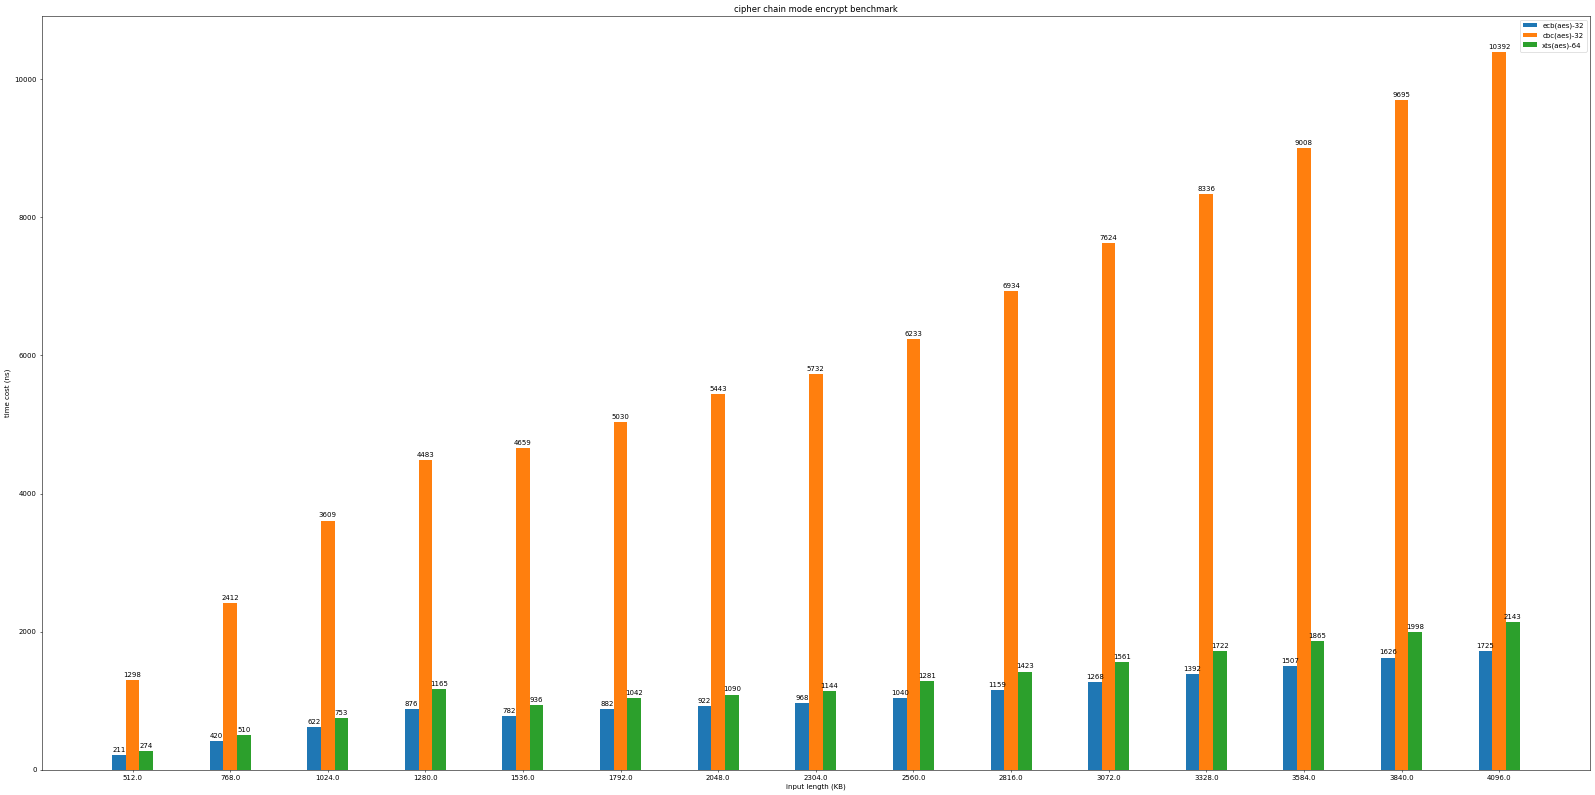

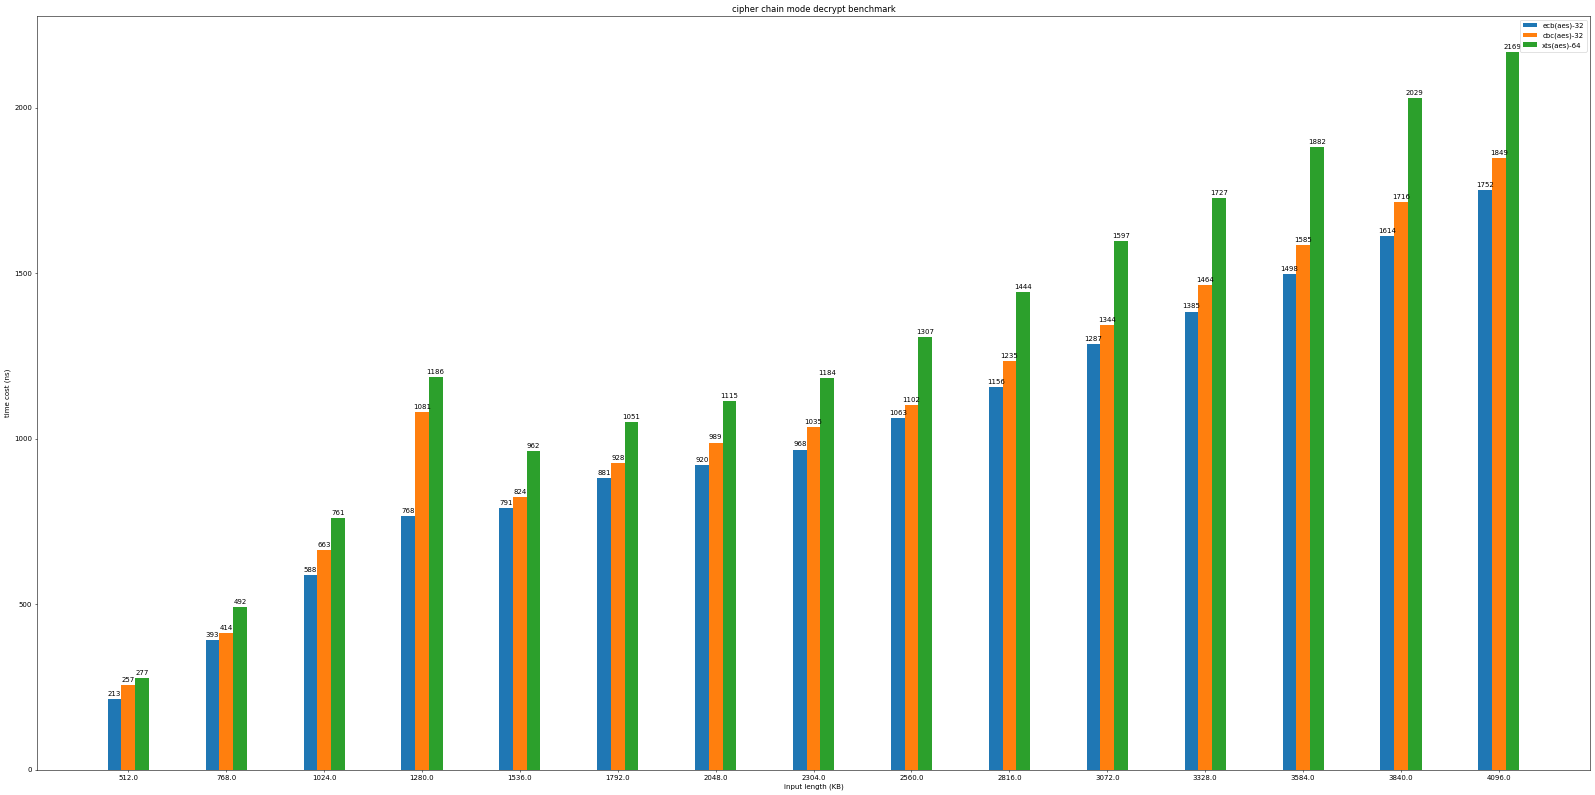

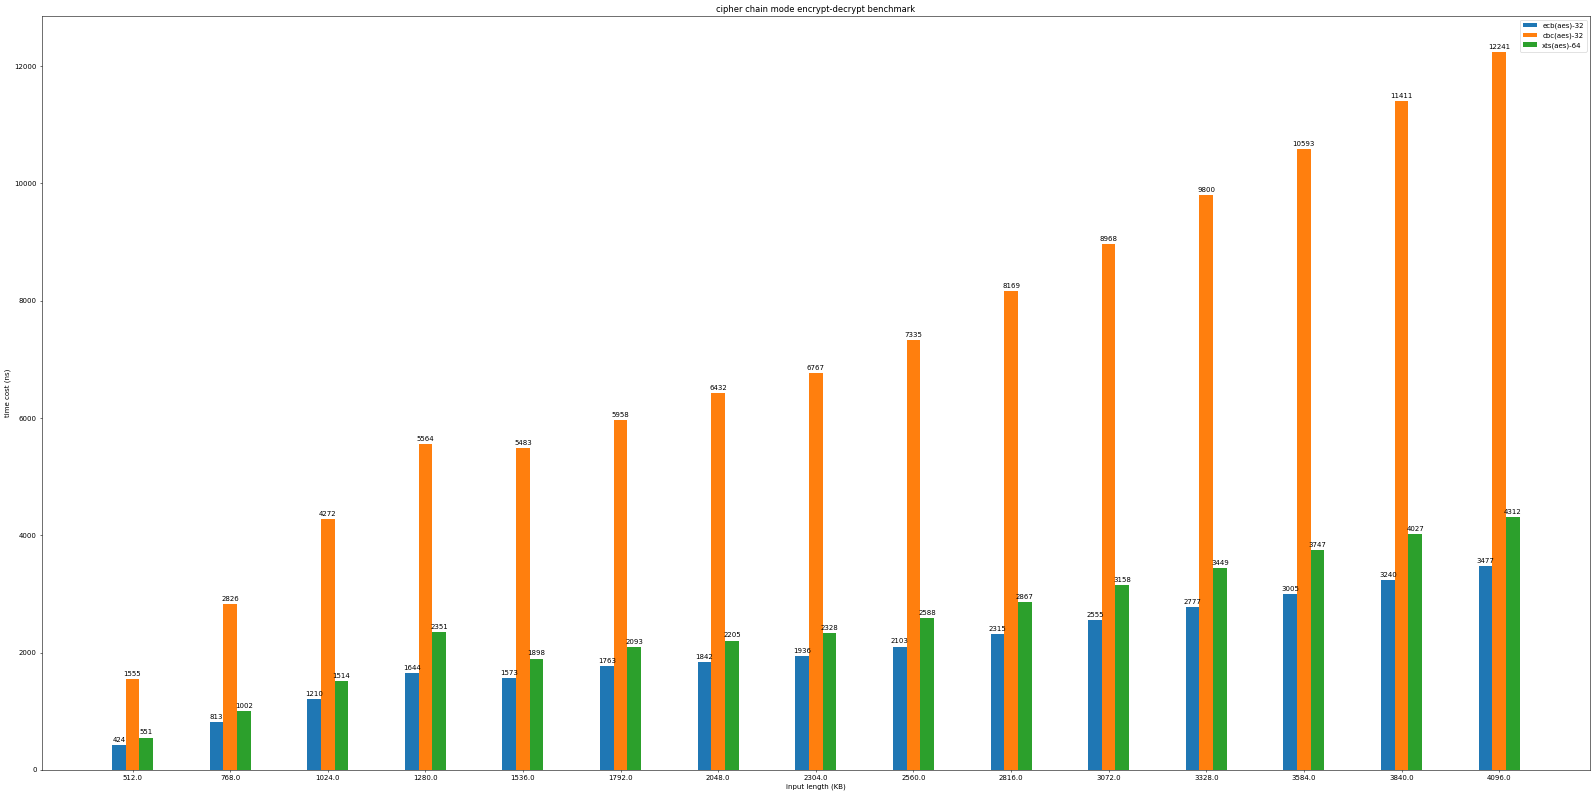

In [55]:
ops = ["encrypt", "decrypt", "encrypt-decrypt"]
for op in ops:
    results = []
    with open("chainmodebench-%s.csv" % op, "r") as f:
        csv_reader = csv.reader(f, delimiter=',', quotechar='|')
        for row in csv_reader:
            results.append(row)
    del results[1]
    plot_results(results, True, op)

In [56]:
!make clean

make -C /lib/modules/5.17.5-1.el7.elrepo.x86_64/build M=/root/workspace/dm-security/benchmark clean
make[1]: Entering directory '/usr/src/kernels/5.17.5-1.el7.elrepo.x86_64'
  CLEAN   /root/workspace/dm-security/benchmark/Module.symvers
make[1]: Leaving directory '/usr/src/kernels/5.17.5-1.el7.elrepo.x86_64'
